# LAB 5 
# Model Development
# Model Evaluation and Refinement

STT: 11

Họ và tên: Nguyễn Mạnh Đức 

Lớp: DS105.N11.2

Buổi 03 - Bài 05 


# Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [4]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv')
df

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
0,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,13495.0
1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,16500.0
2,2823,152,0.822681,0.909722,154.0,19,26,94.5,2.68,16500.0
3,2337,109,0.848630,0.919444,102.0,24,30,99.8,3.19,13950.0
4,2824,136,0.848630,0.922222,115.0,18,22,99.4,3.19,17450.0
...,...,...,...,...,...,...,...,...,...,...
196,2952,141,0.907256,0.956944,114.0,23,28,109.1,3.78,16845.0
197,3049,141,0.907256,0.955556,160.0,19,25,109.1,3.78,19045.0
198,3012,173,0.907256,0.956944,134.0,18,23,109.1,3.58,21485.0
199,3217,145,0.907256,0.956944,106.0,26,27,109.1,3.01,22470.0


In [5]:
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
155,2275,110,0.799135,0.894444,56.0,38,47,95.7,3.27,7788.0
177,3151,161,0.902451,0.923611,156.0,19,24,104.5,3.27,15750.0
159,2169,98,0.810668,0.888889,70.0,29,34,94.5,3.19,8058.0
170,2480,110,0.843825,0.923611,73.0,30,33,102.4,3.27,10698.0
175,3016,171,0.881788,0.940278,161.0,19,24,102.9,3.27,15998.0
167,2714,146,0.846708,0.911111,116.0,24,30,98.4,3.62,11549.0
165,2551,146,0.846708,0.911111,116.0,24,30,98.4,3.62,9989.0
121,2818,156,0.832292,0.920833,145.0,19,24,95.9,3.59,12764.0
194,3045,130,0.907256,0.933333,162.0,17,22,104.3,3.62,18420.0
171,2414,122,0.843825,0.923611,92.0,27,32,102.4,3.31,9988.0


Nhận xét: Dữ liệu có 201 samples và 10 feature 

# Câu 2. Kiểm tra kiểu dữ liệu của các feature ('curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore') trong dataset có bị khuyết giá trị nào không

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  201 non-null    int64  
 1   engine-size  201 non-null    int64  
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   horsepower   201 non-null    float64
 5   city-mpg     201 non-null    int64  
 6   highway-mpg  201 non-null    int64  
 7   wheel-base   201 non-null    float64
 8   bore         201 non-null    float64
 9   price        201 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


Nhận xét: Dữ liệu không bị khuyết giá trị 

# Câu 3. Phát triển mô hình Polynomial Regression bậc 3 để dự đoán giá xe từ biến 'highway-mpg' (tên mô hình poly)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_bt3 = PolynomialFeatures(degree=3)
X_bt3 = df[['highway-mpg']]
X_poly_bt3 = poly_bt3.fit_transform(X_bt3)
y = df['price']

model_bt3 = LinearRegression()
model_bt3.fit(X_poly_bt3, y)

print("intercept_ :  " + str(model_bt3.intercept_))
print("coef_      :  " + str(model_bt3.coef_))

intercept_ :  137923.5937576546
coef_      :  [ 0.00000000e+00 -8.96543312e+03  2.04754306e+02 -1.55663829e+00]


# Câu 4. Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly bằng phương pháp thủ công. Có thể phát họa distribution plot để đánh giá mô hình được không?

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model_bt3.predict(X_poly_bt3)

In [11]:
def sse(y, y_pred):
  SSE = 0
  n = len(y)
  for i in range(n):
    difference = y[i] - y_pred[i]
    squared_difference = difference**2
    SSE += squared_difference

  return SSE

In [12]:
# Hàm tính MSE
def mse(y, y_pred):
  n = len(y) 
  MSE = sse(y, y_pred)/n  
  return MSE

In [13]:
print("MSE: " , mse(y, y_pred))

MSE:  20474146.426361192


In [14]:
# Hàm tính R^2
def r2(y, y_mean, y_pred):
  SSE_model = sse(y, y_pred)
  SSE_baseline = sse(y, y_mean)
  R2 = 1 - SSE_model/SSE_baseline
  return R2

In [15]:
y_mean = [y.mean()]*len(y)
print("R^2: " , r2(y, y_mean, y_pred))

R^2:  0.674194666390652


Nhận xét: Có thể phát họa distribution plot để đánh giá mô hình

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


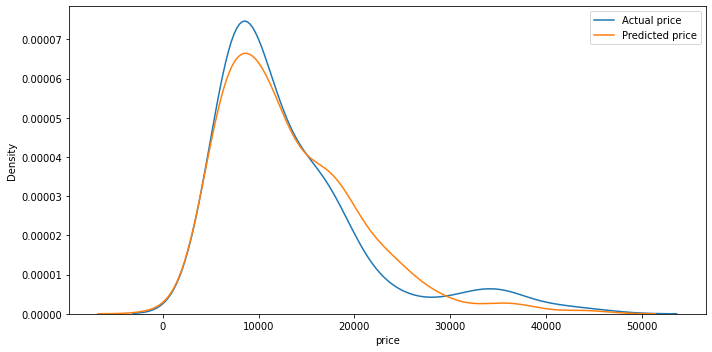

In [22]:
# Phát họa distributon 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.distplot(y, hist=False, label='Actual price')
sns.distplot(y_pred, hist=False, label='Predicted price')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show()

# Câu 5. Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.


In [19]:
X_bt5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
model_cau5 = LinearRegression()
model_cau5.fit(X_bt5, y)

y_pred = model_cau5.predict(X_bt5)

# Câu 6. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không

In [20]:
# MSE 
print("MSE tính bằng phương pháp thủ công: ", mse(y, y_pred))
print("MSE tính bằng phương gọi hàm: ", mean_squared_error(y, y_pred))

MSE tính bằng phương pháp thủ công là:  11980366.870726483
MSE tính bằng phương gọi hàm là:  11980366.87072649


In [21]:
# R2
y_mean = [y.mean()]*len(y)
print("R2 tính bằng phương pháp thủ công: ", r2(y, y_mean, y_pred))
print("R2 tính bằng phương gọi hàm: ", r2_score(y, y_pred))

R2 tính bằng phương pháp thủ công:  0.8093562806577457
R2 tính bằng phương gọi hàm:  0.8093562806577457


Nhận xét: Có thể phát họa distribution plot để đánh giá mô hình

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


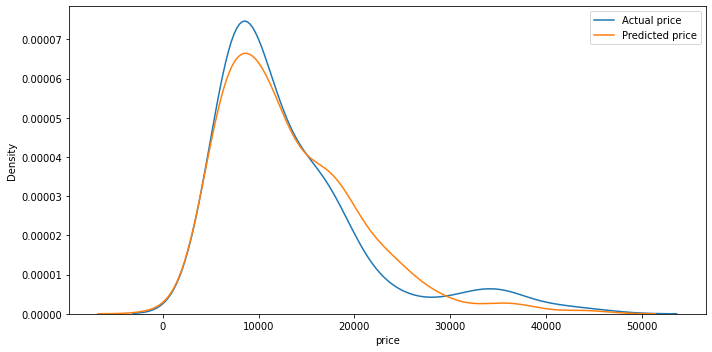

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(y, hist=False, label='Actual price')
sns.distplot(y_pred, hist=False, label='Predicted price')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show()

# Câu 7. Phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.


In [25]:
poly_bt7 = PolynomialFeatures(degree=2)
X_bt7 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_poly_bt7 = poly_bt7.fit_transform(X_bt7)
y = df['price']

model_bt7 = LinearRegression()
model_bt7.fit(X_poly_bt7, y)

print("intercept_ :  " + str(model_bt7.intercept_))
print("coef_      :  " + str(model_bt7.coef_))

y_pred = model_bt7.predict(X_poly_bt7)

intercept_ :  -21262.84827700755
coef_      :  [ 0.00000000e+00  3.79990747e+02  9.53081616e+00 -1.06265103e+02
  1.82168928e+02  1.69423474e+00 -1.86864385e-01 -1.29043091e+00
 -2.14860065e+00  7.57100954e-04  1.11910005e-01 -1.92007463e-01
  8.95252693e-02  4.23869258e-02  4.66019878e+00]


# Câu 8. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?


In [26]:
# MSE 
print("MSE tính bằng phương pháp thủ công: ", mse(y, y_pred))
print("MSE tính bằng phương gọi hàm: ", mean_squared_error(y, y_pred))

MSE tính bằng phương pháp thủ công:  9656613.403989585
MSE tính bằng phương gọi hàm:  9656613.40398959


In [27]:
# R2
y_mean = [y.mean()]*len(y)
print("R2 tính bằng phương pháp thủ công: ", r2(y, y_mean, y_pred))
print("R2 tính bằng phương gọi hàm: ", r2_score(y, y_pred))

R2 tính bằng phương pháp thủ công:  0.8463341969864729
R2 tính bằng phương gọi hàm:  0.8463341969864729


Nhận xét: Có thể phát họa distribution plot để đánh giá mô hình

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


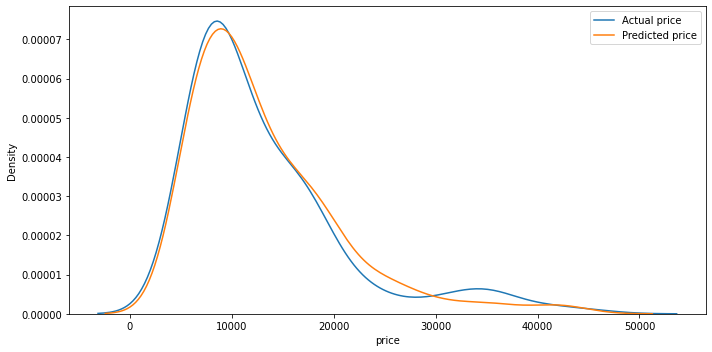

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(y, hist=False, label='Actual price')
sns.distplot(y_pred, hist=False, label='Predicted price')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show()

# Câu 9. Thiết kế một pipeline để phát triển mô hình mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'. Trong pipeline thực hiện các công việc sau: Normalize, Transform => feature, LinearRegression để Fit tìm mô hình. Xuất mô hình vừa tìm được

In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [31]:
X_bt9 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [32]:
pipeline_bt9 = Pipeline([('scaler', StandardScaler()),
                 ('transform', PolynomialFeatures(degree=2)),
                 ('model', LinearRegression())])

In [33]:
pipeline_bt9.fit(X_bt9, y)
y_pred = pipeline_bt9.predict(X_bt9)

In [36]:
print('MSE: ', mean_squared_error(y_pred, y))
print('R2: ', r2_score(y_pred, y))

MSE:  9656613.403989598
R2:  0.8184336594684674


# Câu 10. Tìm khoảng giá trị chặn của các mô hình.


In [35]:
print('Khoảng chặn dưới: price =', df['price'].min())
print('Khoảng chặn trên: highway-mpg =', df['highway-mpg'].min())

Khoảng chặn dưới: price = 5118.0
Khoảng chặn trên: highway-mpg = 16


# Câu 11. Xếp hạng các mô hình đã phát triển các câu trên

Kết quả MSE và R2 của các model từ các câu trên là: 

Bài tập 3 

MSE:  20474146.426361192 
R2:   0.674194666390652

Bài tập 5 

MSE:  11980366.870726483
R2:   0.8093562806577457

Bài tập 7

MSE:  9656613.403989585
R2:   0.8463341969864729

Bài tập 9

MSE:  9656613.403989598
R2:   0.8184336594684674

Nhận xét: Dựa vào các chỉ số MSE và R2 để đánh giá các mô hình trên, xếp hạng thứ tự mô hình trên từ kém nhất đến tốt nhất là:

Model Bài 3 (kém nhất) -> Model Bài 5 -> Model bài 9 -> Model bài 7 (Tốt nhất)

# Câu 12. *Anh/chị có thể phát triển một mô hình nào khác tốt hơn các mô hình đã phát triển bên trên. Nếu có thì chứng minh mô hình của bạn là tốt hơn?

In [43]:
from sklearn.ensemble import RandomForestRegressor
random_forest_bt3 = RandomForestRegressor() 
random_forest_bt3.fit(X_poly_bt3, y)

y_pred_bt3 = random_forest_bt3.predict(X_poly_bt3)
print("MSE BT3-random forest: ", mean_squared_error(y, y_pred_bt3))
print("R2 BT3-random forest: ", r2_score(y, y_pred_bt3))
print("")


random_forest_bt5 = RandomForestRegressor() 
random_forest_bt5.fit(X_bt5, y)

y_pred_bt5 = random_forest_bt5.predict(X_bt5)
print("MSE BT5-random forest: ", mean_squared_error(y, y_pred_bt5))
print("R2 BT5-random forest: ", r2_score(y, y_pred_bt5))
print("")


random_forest_bt7 = RandomForestRegressor() 
random_forest_bt7.fit(X_poly_bt7, y)

y_pred_bt7 = random_forest_bt7.predict(X_poly_bt7)
print("MSE BT7-random forest: ", mean_squared_error(y, y_pred_bt7))
print("R2 BT7-random forest: ", r2_score(y, y_pred_bt7))
print("")


random_forest_bt9 = RandomForestRegressor() 
random_forest_bt9.fit(X_bt9, y)

y_pred_bt9 = random_forest_bt9.predict(X_bt9)
print("MSE BT9-random forest: ", mean_squared_error(y, y_pred_bt9))
print("R2 BT9-random forest: ", r2_score(y, y_pred_bt9))

MSE BT3-random forest:  13536868.426819995
R2 BT3-random forest:  0.7845876530341012

MSE BT5-random forest:  689066.9974172814
R2 BT5-random forest:  0.9890348687414058

MSE BT7-random forest:  677352.4253141175
R2 BT7-random forest:  0.9892212828654763

MSE BT9-random forest:  681165.7570181196
R2 BT9-random forest:  0.9891606012730859


Nhận xét: Cùng với dữ liệu đầu vào như các model sử dụng ở các model từ bài 3, 5, 7, 9 thì khi áp dụng Model random forest đều cho ra kết quả MSE và R2 tương ứng tốt hơn hẳn so với model cũ

# Câu 13. Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheelbase', 'bore'.
